# Project 1: Covid 19's Effect on the world economy & how Historical events can help better prepare for future unforeseen events
Team Members:  	Maxwell Miorada, Jay Cao, Chapman Mong and Luke Macumber

## Project Description/Outline:
To see what effect Covid 19 has had on the world economy in relation to financial markets, Industry Sectors, Country GDP’s (imports/exports), Commodities, health sector data.


In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file C:\Users\ljmac\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\ljmac\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\ljmac\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [35]:
# Set the file paths
audusd_data = Path("Data/audusd.csv")
cadusd_data = Path("Data/cadusd.csv")
chfusd_data = Path("Data/chfusd.csv")
eurusd_data = Path("Data/eurusd.csv")
gbpusd_data = Path("Data/gbpusd.csv")
usdcny_data = Path("Data/usdcny.csv")
usdjpy_data = Path("Data/usdjpy.csv")
sp500_data = Path("Data/sp500.csv")
vix_data = Path("Data/vix_history.csv")
xlb_data = Path("Data/xlb.csv")
xle_data = Path("Data/xle.csv")
xlf_data = Path("Data/xlf.csv")
xli_data = Path("Data/xli.csv")
xlp_data = Path("Data/xlp.csv")
xlu_data = Path("Data/xlu.csv")
xlv_data = Path("Data/xlv.csv")
xly_data = Path("Data/xly.csv")
covid_data = Path("Data/covid19_global_table_data.csv")

# Read the CSVs and set the `Date` column as a datetime index to the DataFrame
# Currency
audusd_df = pd.read_csv(audusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cadusd_df = pd.read_csv(cadusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
chfusd_df = pd.read_csv(chfusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurusd_df = pd.read_csv(eurusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
gbpusd_df = pd.read_csv(gbpusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdcny_df = pd.read_csv(usdcny_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdjpy_df = pd.read_csv(usdjpy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# S&P500 & Volatility Index
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_df = pd.read_csv(vix_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_close_df = vix_df.drop(columns=['Open','High','Low'])
# Sectors : Energy. XLE, Materials.XLB, Industrials.XLI, Utilities. XLU, Healthcare.XLV, 
#           Financials.XLF, Consumer Discretionary.XLY, Consumer Staples.XLP
xlb_df = pd.read_csv(xlb_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xle_df = pd.read_csv(xle_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlf_df = pd.read_csv(xlf_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xli_df = pd.read_csv(xli_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlp_df = pd.read_csv(xlp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlu_df = pd.read_csv(xlu_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlv_df = pd.read_csv(xlv_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xly_df = pd.read_csv(xly_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Covid 19 global data
covid_df = pd.read_csv(covid_data, index_col= 0, infer_datetime_format=True, parse_dates=True)

# Display a few rows
#covid_df.head()

## Create pivot tables for Currency, Sectors, S&P 500 and VIX index

In [62]:
# Create a new pivot table where the columns are the closing prices for each pair
fx_combined_df = pd.concat([audusd_df, eurusd_df, gbpusd_df], axis="columns", join="inner")#, cadusd_df, chfusd_df, sp500_df, usdcny_df, usdjpy_df
# Create a new pivot table where the columns are the closing prices for each sector
sector_combined_df = pd.concat([xlb_df, xle_df, xlf_df, xli_df, xlp_df, xlu_df, xlv_df, xly_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
fx_combined_df.sort_index(inplace=False)
sector_combined_df.sort_index(inplace=False)

# Set column names
fx_combined_df.columns = ['AUDUSD', 'EURUSD', 'GBPUSD']# 'CADUSD', 'CHFUSD', 'USDCNY', 'USDJPY']#, 'SP500']
sector_combined_df.columns = ['Materials', 'Energy', 'Financials', 'Industrials', 'Cons Staples', 'Utilities', 'Healthcare', 'Cons Disc']

# Display a few rows
#fx_combined_df.head(10)
#sector_combined_df.head(10)

## S&P500 and the VIX are often seen as a benchmark for global economy health and volatility.
a plot of the VIX index overlayed on the S&P500

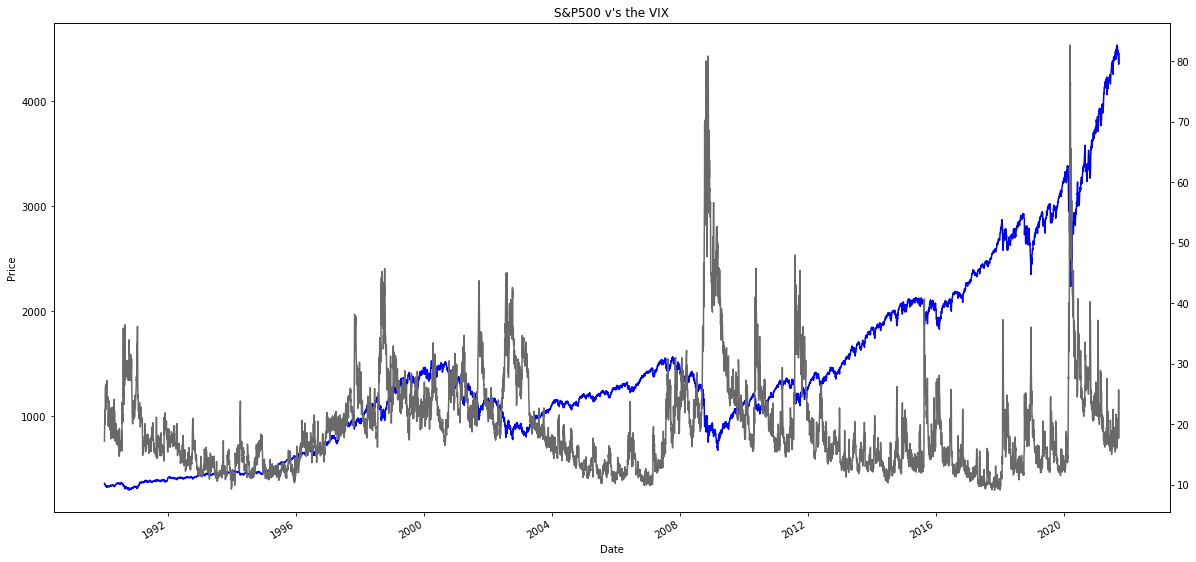

In [65]:
# Create a new pivot table where the columns are the closing prices for the sp500 and the VIX index (Fear index)
sp_vix_combined_df = pd.concat([sp500_df, vix_close_df], axis="columns", join="inner")
sp_vix_combined_df.columns = ['SP500', 'VIX']

sp_vix_combined_df.head()
#sp_vix_plot = sp_vix_combined_df.plot(xlabel="Date", ylabel="Price", title="SP500 V's VIX", secondary_y=True)
#sp500_df.plot() * vix_close_df.plot(secondary_y=True, style='g')
plt.figure()
sp_vix_combined_df.SP500.plot(style='b')
sp_vix_combined_plot = sp_vix_combined_df.VIX.plot(secondary_y=True, style='dimgrey', figsize=(20, 10), xlabel="Date", ylabel="Price", title="S&P500 v's the VIX")


## Combined Currency Plot of AUD, EUR and GBP against the USD

[]

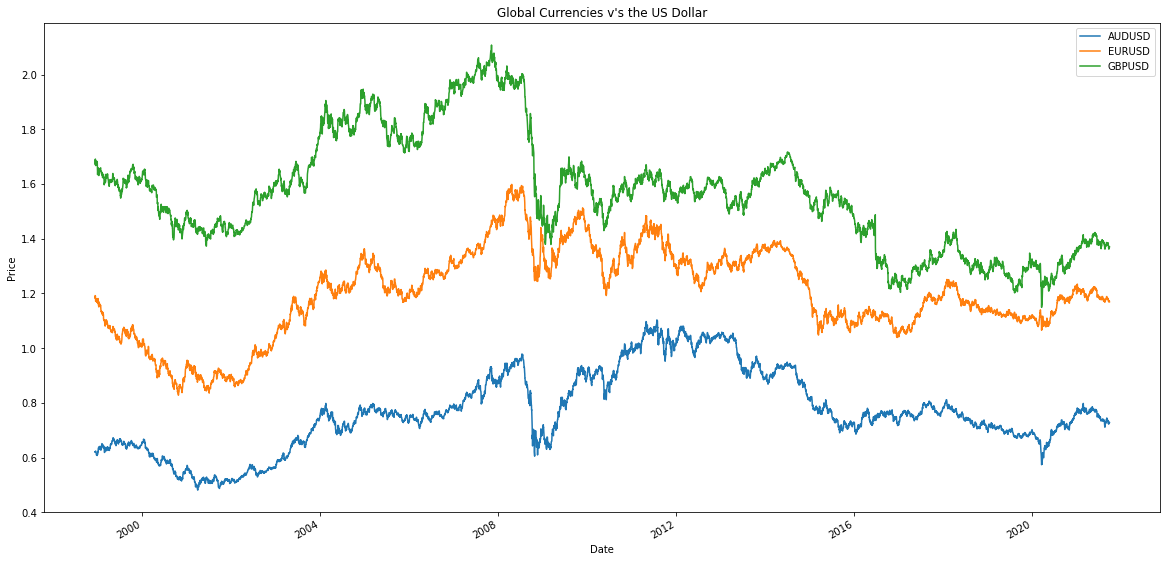

In [66]:
#fx_combined_df.plot()
fx_plot = fx_combined_df.plot(figsize=(20, 10), xlabel="Date", ylabel="Price", title="Global Currencies v's the US Dollar")#subplots=True, 
fx_plot.plot()
## US Dollar strengthens during times of Crisis!

## Combined Market Sector Plot from 2019 to 2021
This plot shows sector speed of recovery

[]

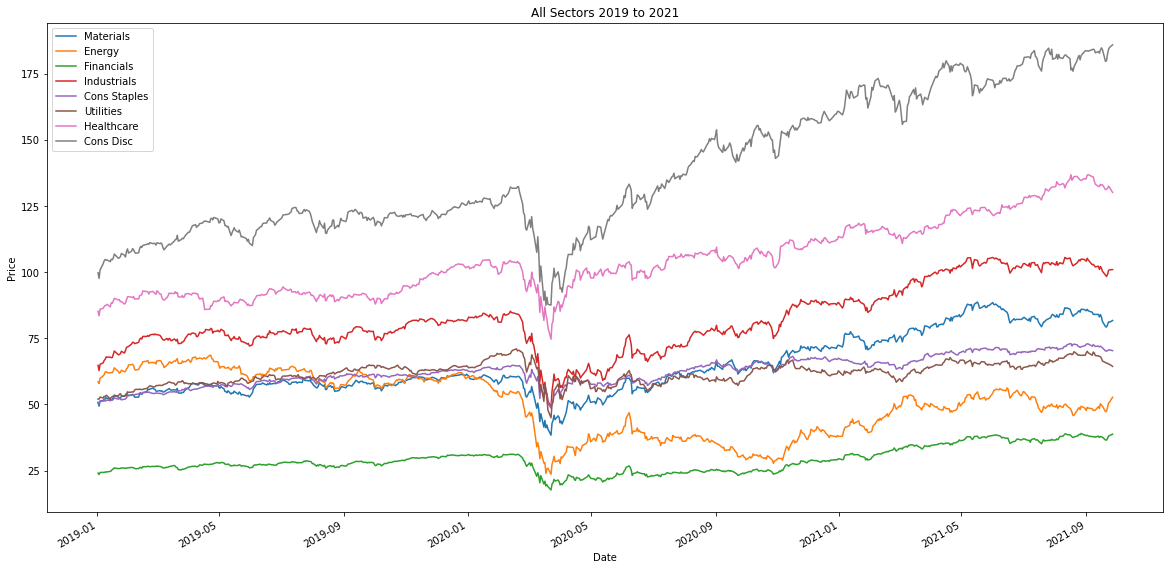

In [72]:
#sector_combined_df.plot()
sector_plot = sector_combined_df.plot(figsize=(20, 10), xlabel="Date", ylabel="Price", title="All Sectors 2019 to 2021")
sector_plot.plot()


In [70]:
# Use the `pct_change` and Standard Deviation to calculate daily changes in currency prices
fx_daily_change = fx_combined_df.pct_change()
fx_daily_change_std = fx_daily_change.std
fx_daily_change_std

<bound method NDFrame._add_numeric_operations.<locals>.std of               AUDUSD    EURUSD    GBPUSD
Date                                    
1998-12-10       NaN       NaN       NaN
1998-12-11  0.000161  0.007352  0.008966
1998-12-14 -0.002738 -0.000671  0.001718
1998-12-15  0.006946 -0.007136 -0.004554
1998-12-16  0.000481 -0.009639 -0.009446
...              ...       ...       ...
2021-09-23  0.008841  0.004363  0.007538
2021-09-24 -0.004879 -0.001661 -0.003411
2021-09-25  0.000000  0.000000  0.000000
2021-09-26  0.000716  0.000290 -0.000358
2021-09-27  0.001830 -0.002350  0.002469

[6903 rows x 3 columns]>

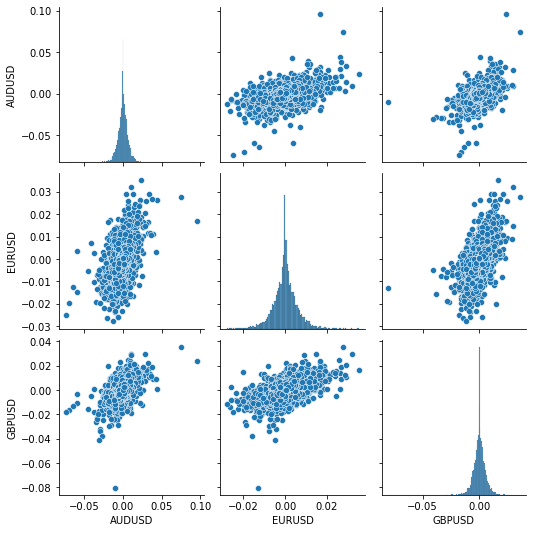

In [125]:
sns.pairplot(data = fx_daily_change[1:])

In [71]:
# Use the `pct_change` and standard deviation to calculate daily changes in sectors
sector_daily_change = sector_combined_df.pct_change()
sector_daily_change_std = sector_daily_change.std
sector_daily_change_sum = sector_daily_change.cumsum()
sector_daily_change_sum.head()

Materials    Energy  Financials  Industrials  Cons Staples  \
Date                                                                     
2019-01-02        NaN       NaN         NaN          NaN           NaN   
2019-01-03  -0.028358 -0.009918   -0.022481    -0.030429     -0.005745   
2019-01-04   0.010961  0.024106    0.010738     0.007487      0.015574   
2019-01-07   0.014472  0.038972    0.011975     0.015622      0.014209   
2019-01-08   0.024965  0.046707    0.012798     0.029325      0.023390   

            Utilities  Healthcare  Cons Disc  
Date                                          
2019-01-02        NaN         NaN        NaN  
2019-01-03  -0.000192   -0.020305  -0.021652  
2019-01-04   0.014615    0.009526   0.011442  
2019-01-07   0.007793    0.013365   0.034055  
2019-01-08   0.020196    0.021129   0.045111

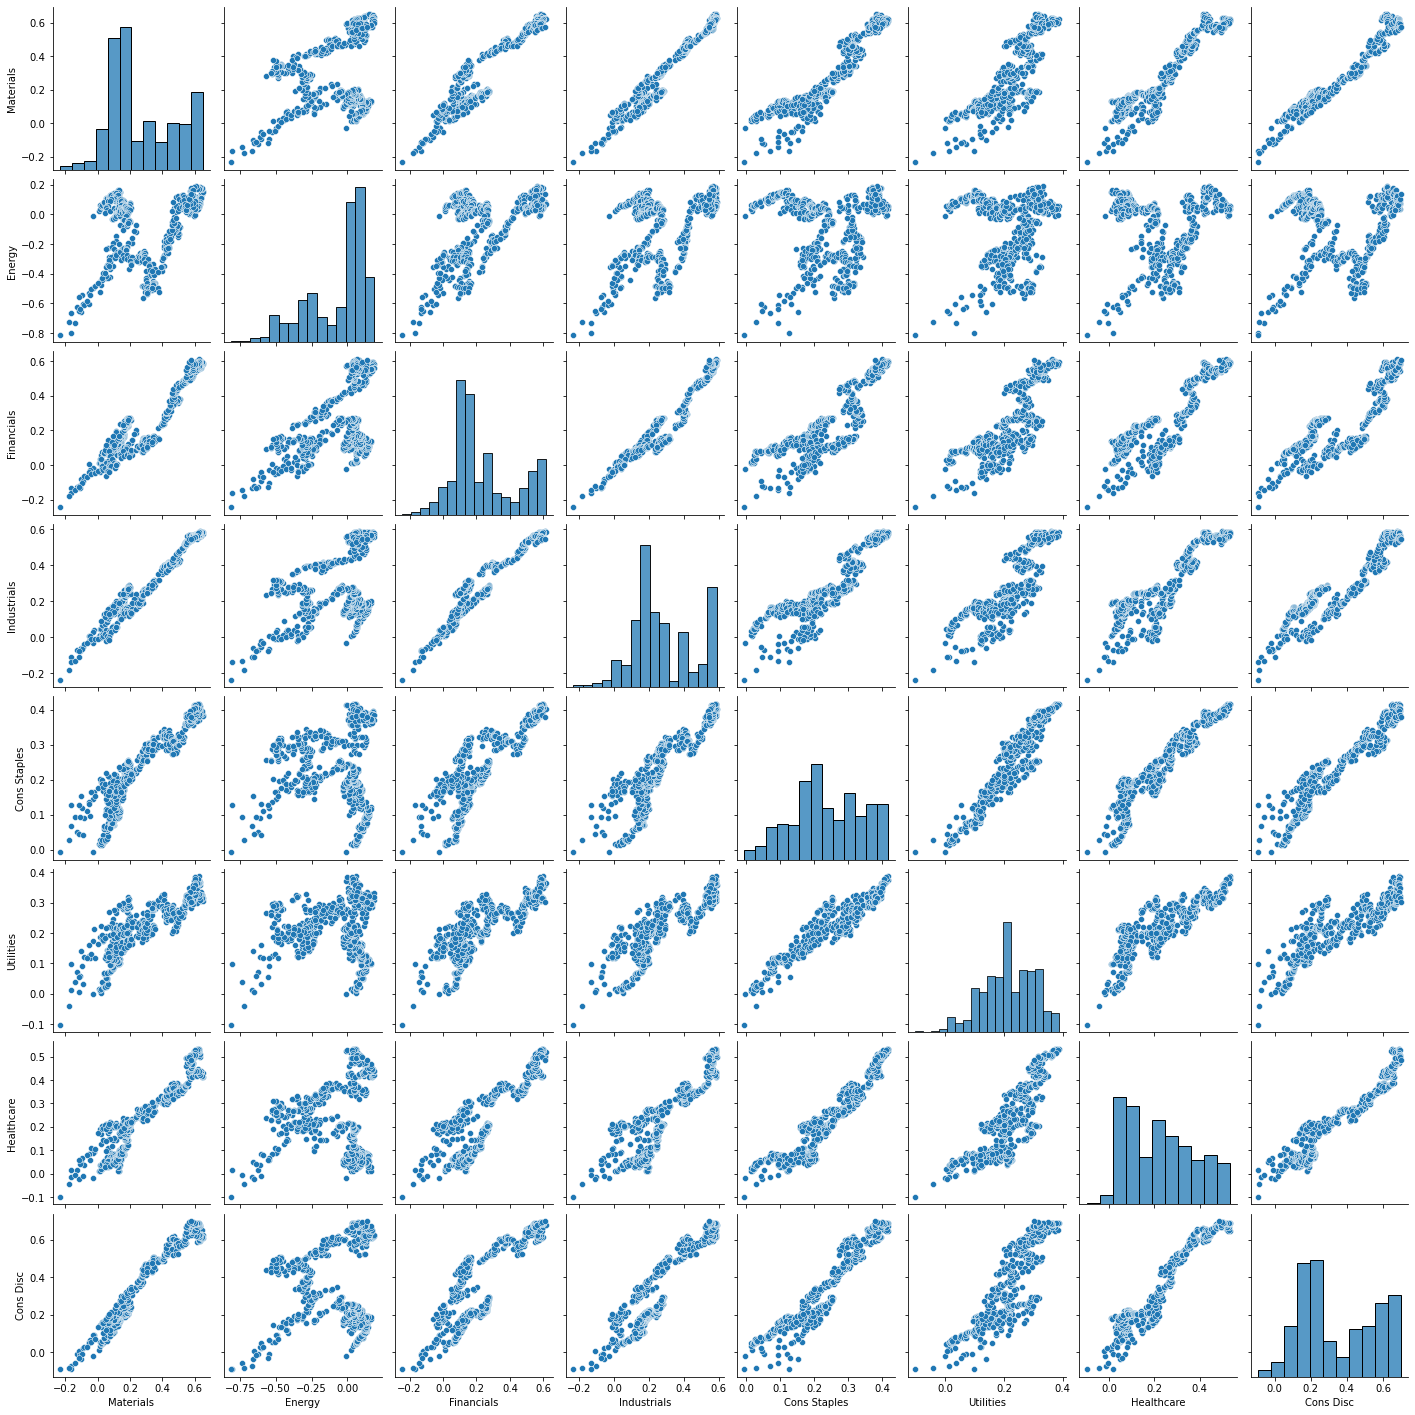

In [126]:
sns.pairplot(data = sector_daily_change_sum[1:])

In [73]:
# Use hvplot() function to plot data (LABEL CHART)
fx_daily_change_plot = fx_daily_change.hvplot(figsize=(20, 10), xlabel="Date", ylabel="Change", title="Currency Daily Changes")
fx_daily_change_plot
# You can clearly visualise huge spikes within each currency

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [86]:
# Use hvplot() function to plot data
sector_daily_change.hvplot() 
sector_daily_change_sum_plot = sector_daily_change_sum.hvplot(figsize=(80, 40), xlabel="Date", ylabel="Change", title="Sector Daily Changes Sum Plot")
sector_daily_change_sum_plot
# 

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [12]:
# Correlation for currency pairs
#  Use the `corr` function to calculate the correlation between changes in currency
fx_correlation = fx_daily_change.corr()
fx_correlation

AUDUSD    EURUSD    GBPUSD
AUDUSD  1.000000  0.530327  0.505773
EURUSD  0.530327  1.000000  0.601509
GBPUSD  0.505773  0.601509  1.000000

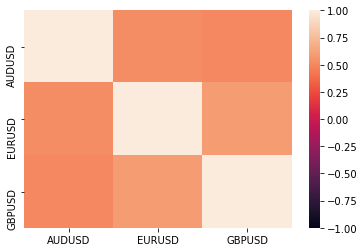

In [13]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
fx_correlation_heatmap = sns.heatmap(fx_correlation, vmin=-1, vmax=1)
#(SEE IF THERE IS ANY DIFFERING CORRELATIONS DURING CRISIS BY SLICING DATA)

In [14]:
# Correlation for sectors
#  Use the `corr` function to calculate the correlation between changes in sectors
sector_correlation = sector_daily_change.corr()
sector_correlation

Materials    Energy  Financials  Industrials  Cons Staples  \
Materials      1.000000  0.765326    0.879120     0.914204      0.733370   
Energy         0.765326  1.000000    0.821325     0.792518      0.519605   
Financials     0.879120  0.821325    1.000000     0.918709      0.710973   
Industrials    0.914204  0.792518    0.918709     1.000000      0.744417   
Cons Staples   0.733370  0.519605    0.710973     0.744417      1.000000   
Utilities      0.670682  0.466541    0.657450     0.682903      0.820983   
Healthcare     0.757344  0.574634    0.727895     0.766894      0.805412   
Cons Disc      0.819506  0.649349    0.795488     0.838918      0.718841   

              Utilities  Healthcare  Cons Disc  
Materials      0.670682    0.757344   0.819506  
Energy         0.466541    0.574634   0.649349  
Financials     0.657450    0.727895   0.795488  
Industrials    0.682903    0.766894   0.838918  
Cons Staples   0.820983    0.805412   0.718841  
Utilities      1.000000    0.734674   0.633845  
Healthcare     0.734674    1.000000   0.762186  
Cons Disc      0.633845    0.762186   1.000000

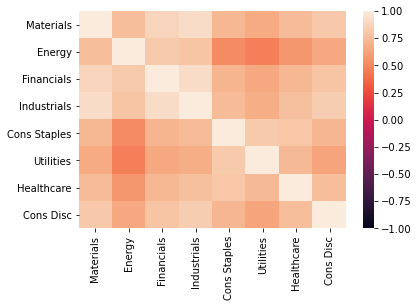

In [15]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sector_correlation_heatmap = sns.heatmap(sector_correlation, vmin=-1, vmax=1)
#(SEE IF THERE IS ANY DIFFERING CORRELATIONS DURING CRISIS BY SLICING DATA)

In [16]:
# Slice DataFrame into recent crisis points
# Slice DataFrame into approximate start of covid19
daily_change_covid = fx_daily_change.loc['2019-12-1':'2021-09-29']
daily_change_covid

# Slice DataFrame into GFC timeframe
daily_change_gfc = fx_daily_change.loc['2007-06-1':'2009-06-1']
daily_change_gfc

# Slice DataFrame into Dot Com timeframe
daily_change_dotcom = fx_daily_change.loc['2000-1-1':'2002-12-30']
daily_change_dotcom

# Slice DataFrame into 10 year timeframe
#daily_return_10_year = fx_daily_changes.loc['2009-04-29':'2019-04-29']
#daily_return_10_year

AUDUSD    EURUSD    GBPUSD
Date                                    
2000-01-03  0.005658  0.018904  0.012632
2000-01-04 -0.004410  0.004101  0.001040
2000-01-05  0.004124  0.003987  0.002749
2000-01-06 -0.005932 -0.000484  0.003289
2000-01-07  0.002295 -0.002229 -0.005100
...              ...       ...       ...
2002-12-24  0.003562  0.004389  0.000439
2002-12-25 -0.000355  0.002039  0.000753
2002-12-26  0.000355  0.004555  0.003134
2002-12-27 -0.004437  0.007332  0.002187
2002-12-30  0.008556  0.002681 -0.000374

[774 rows x 3 columns]

In [124]:
# Display hvplot of Covid19 daily changes (WANT TO SCALE THIS TO ONLY PLOT DATA NOT SPACES)
#fx_historic_crashes = daily_change_covid.hvplot() * daily_change_gfc.hvplot() * daily_change_dotcom.hvplot()
#fx_historic_crashes

In [82]:
# Display currency daily change during historic crisis
fx_change_covid = daily_change_covid.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', height=400, width=700)
fx_change_gfc = daily_change_gfc.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', height=400, width=700)
fx_change_dotcom = daily_change_dotcom.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', height=400, width=700)#, xlim=(2000-1-1, 2002-12-30)
fx_historic_crashes = fx_change_covid * fx_change_gfc * fx_change_dotcom
fx_historic_crashes

:Overlay
   .NdOverlay.I   :NdOverlay   [Variable]
      :Curve   [Date]   (% of Change)
   .NdOverlay.II  :NdOverlay   [Variable]
      :Curve   [Date]   (% of Change)
   .NdOverlay.III :NdOverlay   [Variable]
      :Curve   [Date]   (% of Change)

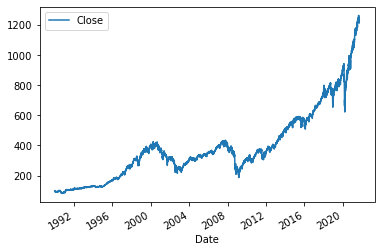

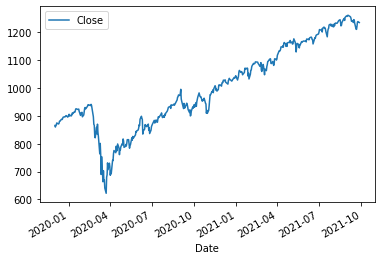

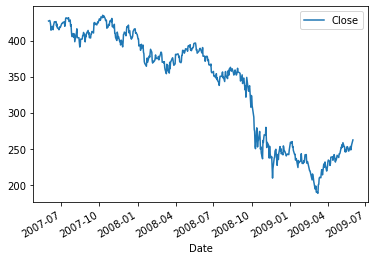

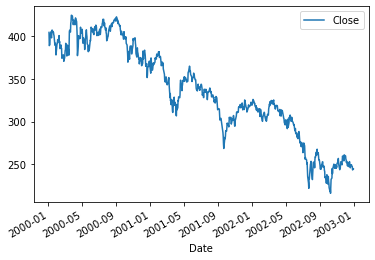

In [92]:
# S&P500 percent change
sp500_change = sp500_df.pct_change()
sp500_change_std = sp500_change.std
initial_start = 100
sp500_cumulative = (1 + sp500_change).cumprod()
(initial_start * sp500_cumulative).plot.line(label="S&P 500 from 1990 to 2021")

# Slice sp500 DataFrame into recent crisis points
# Slice DataFrame into approximate start of covid19
sp500_covid = sp500_cumulative.loc['2019-12-1':'2021-09-29']
sp500_covid_plot = (initial_start * sp500_covid).plot(label="S&P 500 Covid19")

# Slice sp500 DataFrame into GFC timeframe
sp500_gfc = sp500_cumulative.loc['2007-06-1':'2009-06-1']
sp500_gfc_plot =  (initial_start * sp500_gfc).plot(label="S&P 500 GFC")

# Slice sp500 DataFrame into Dot Com timeframe
sp500_dotcom = sp500_cumulative.loc['2000-1-1':'2002-12-30']
sp500_dotcom_plot = (initial_start * sp500_dotcom).plot.line(label="S&P 500 DotCom")



In [117]:
# Display sp500 hvplot of Covid19 percentage changes (RESCALE TO SHOW ONLY DATA AREA AND BEGIN CHART AT 100%)
plot_sp500_covid = sp500_covid.hvplot(label="S&P500 v Covid19", height=400, width=1000, rot=90).opts(yformatter="%.0f")
plot_sp500_gfc = sp500_gfc.hvplot(label="S&P500 v GFC", rot=90).opts(yformatter="%.0f")
plot_sp500_dotcom = sp500_dotcom.hvplot(label="S&P500 v Dot-Com", rot=90).opts(yformatter="%.0f")
plot_sp500_historic_plot = plot_sp500_covid * plot_sp500_gfc * plot_sp500_dotcom
# COMPARE HOW QUICKLY EACH HISTORICAL CRASH DROPPED & THEN RECOVERED

- - - 

## S&P500 vs VIX (Fear Index)


In [130]:
#vix_close_df.plot(xlabel="Date", ylabel="Price", title="VIX Index 1990 to 2021")
vix_change_plot = vix_close_df.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', title="Volatility Index", height=400, width=700)
vix_change_plot

:Curve   [Date]   (Close)

<AxesSubplot:title={'center':'VIX Index v DotCom'}, xlabel='Date', ylabel='Price'>

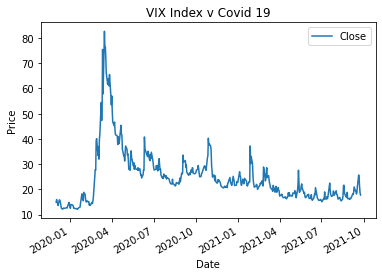

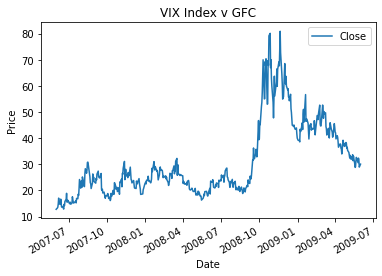

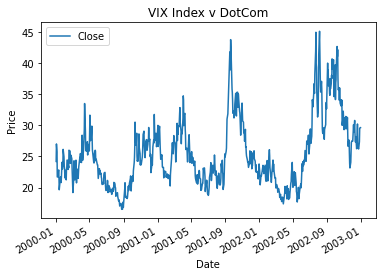

In [139]:
vix_covid = vix_close_df.loc['2019-12-1':'2021-09-29']
vix_gfc = vix_close_df.loc['2007-06-1':'2009-06-1']
vix_dotcom = vix_close_df.loc['2000-1-1':'2002-12-30']
vix_covid.plot(xlabel="Date", ylabel="Price", title="VIX Index v Covid 19"), 
vix_gfc.plot(xlabel="Date", ylabel="Price", title="VIX Index v GFC"), 
vix_dotcom.plot(xlabel="Date", ylabel="Price", title="VIX Index v DotCom") 

In [121]:
# Put covid plots in a single row
row_of_currency = pn.Row(fx_plot, fx_daily_change_plot, fx_correlation_heatmap, fx_change_covid)
row_of_sector = pn.Row(sector_daily_change_sum_plot)# sector_correlation_heatmap,sector_plot, )
row_of_sp500vix = pn.Row(plot_sp500_historic_plot)

In [122]:
# Insert row_of_parallel and row_of_Bar into a column object with Markdown text
plots_as_column = pn.Column(
    "# Covid 19's Effect on the world economy", row_of_sp500vix
)

In [123]:
# Create tabs
tabs = pn.Tabs(
    ("S&P500", plots_as_column),
    ("Currency Plots", row_of_currency),
    ("Sector Plots", row_of_sector)
    
)
tabs

BokehModel(combine_events=True, render_bundle={'docs_json': {'5663c416-725c-4daa-9990-7aaaa9fb1919': {'defs': …

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Overlay)
    [1] Row
        [0] Str(AxesSubplot)
        [1] HoloViews(NdOverlay)
        [2] Str(AxesSubplot)
        [3] HoloViews(NdOverlay)
    [2] Row
        [0] HoloViews(NdOverlay)

In [27]:
# Save the dataframe as a csv file
housing_units_df.to_csv('housing_units_df.csv')

NameError: name 'housing_units_df' is not defined

In [ ]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units_df.hvplot.bar(xlabel="Year", ylabel="Housing Units", title="San Francisco Average Housing Units", ylim=(370000, 390000), yformatter='%.0f')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [ ]:
# Calculate the average sale price per square foot and average gross rent
average_housing_cost = (
    sfo_data[["sale_price_sqr_foot", "gross_rent"]]
    .groupby("year")
    .mean()
    )
average_housing_cost

In [ ]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sale_price_sqr_foot_plot = average_housing_cost["sale_price_sqr_foot"].hvplot(xlabel="Year", ylabel="Price Per Sq Foot", title="San Francisco Average Sale Price Per Sq Foot")
sale_price_sqr_foot_plot.plot()

In [ ]:

# Line chart for average montly rent
gross_rent_plot = average_housing_cost["gross_rent"].plot(xlabel="Year", ylabel="Gross Rent", title="San Francisco Average Monthly Rent")
gross_rent_plot.plot()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [ ]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = (
    sfo_data.groupby(["year","neighborhood"])
    .mean()
    )
neighborhood_df.head()

In [ ]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Average Sale Price Per Sq Foot", groupby="neighborhood")



In [ ]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot.line(x="year", y="gross_rent", xlabel="Year", ylabel="Average Monthly Rent", groupby="neighborhood")

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [ ]:
# Getting the data from the top 10 expensive neighborhoods to own
mean_of_neighborhood = (
    neighborhood_df.groupby(["neighborhood"])
    .mean()
    .round(2)
    )
#mean_of_neighborhood.head()
most_expensive_neighborhoods = mean_of_neighborhood.sort_values("sale_price_sqr_foot", ascending= False).head(10)
most_expensive_neighborhoods.head()

In [ ]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive_neighborhoods.hvplot.bar(
    x="neighborhood", y="sale_price_sqr_foot",
    xlabel="Neighborhood", ylabel="Avg. Sale Price Per Square Foot",
    title="Top 10 Expensive Neighborhoods in SFO",
    yformatter='%.0f', rot=90, color='red')

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [ ]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
purchase_v_rental = (
    neighborhood_df.groupby(["year","neighborhood"])
    .mean()
    .round(2)
    )


purchase_v_rental.sort_values("sale_price_sqr_foot", ascending= False).head(10)
purchase_v_rental


In [ ]:
# Plotting the data from the top 10 expensive neighborhoods
purchase_v_rental.hvplot.bar("year",["gross_rent", "sale_price_sqr_foot"], xlabel="Neighborhood", ylabel="Dollars",
    title="Top 10 Expensive Neighborhoods in SFO",rot=90, groupby="neighborhood")
 

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [ ]:
# Load neighborhoods coordinates data
#Read the Mapbox API key
#load_dotenv()
#map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_coordinates_df = pd.read_csv(file_path)
neighborhood_coordinates_df.head()


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [ ]:
# Calculate the mean values for each neighborhood
mean_of_neighborhood = mean_of_neighborhood.reset_index().rename(columns = {'neighborhood':'Neighborhood'})
mean_of_neighborhood.head()

In [ ]:
# Join the average values with the neighborhood locations
neighborhood_av_values = pd.merge(neighborhood_coordinates_df, mean_of_neighborhood, on='Neighborhood')
#neighborhood_av_values = pd.concat([neighborhood_coordinates_df, mean_of_neighborhood], axis=1)
#neighborhood_coordinates_df.join ( neighborhood_av_values.set_index( [ 'Neighborhood' ], verify_integrity=True ), on=[ 'neighborhood' ], how='left' )
neighborhood_av_values.head()

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [ ]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
neighborhood_info_plot = px.scatter_mapbox(
    neighborhood_av_values,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
    title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
    hover_name="Neighborhood",
    zoom=12,
    width=1000, height=800
    
    
)
neighborhood_info_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [ ]:
# Fetch the data from all expensive neighborhoods per year.
expensive_neighborhoods_per_year_df = sfo_data.sort_values("sale_price_sqr_foot",  ascending= False).reset_index().round(2).head(10)
expensive_neighborhoods_per_year_df

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
most_expensive_para_cat_plot = px.parallel_categories(
        expensive_neighborhoods_per_year_df,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "sale_price_sqr_foot": "Sale Price Per Square Foot",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent",
            },
        width=1200,
    )
most_expensive_para_cat_plot.show()


In [ ]:
# Parallel Coordinates Plot
px.parallel_coordinates(expensive_neighborhoods_per_year_df, color='sale_price_sqr_foot', 
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"])

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
sunburst_plot_df = sfo_data.sort_values("sale_price_sqr_foot",  ascending= False).reset_index().round(2).head(10)
fig = px.sunburst(sunburst_plot_df, path=['year', 'neighborhood'], values='sale_price_sqr_foot',
    color= 'gross_rent')
fig.show()